In [8]:
import math
import collections

import numpy as np
import pandas as pd
import matplotlib.pyplot as pp

%matplotlib inline

In [9]:
import getweather

def smooth(array, window = 10, mode = 'valid'):
    return np.correlate(array, np.ones(window) / window, mode)

In [11]:
station = 'NEW YORK'

allyears = np.arange(1880, 2020)

alldata = np.vstack([getweather.getyear(station,['TMIN', 'TMAX'], year)
                     for year in allyears])

In [12]:
allavg = np.nanmean(0.5 * (alldata["TMIN"] + alldata["TMAX"]), axis =1)

In [13]:
allavg.shape

(140,)

In [14]:
allyears.index(1945)
#doesnt work

AttributeError: 'numpy.ndarray' object has no attribute 'index'

In [15]:
list(allyears).index(1945), list(allyears).index(1955)

(65, 75)

In [16]:
midcentury = np.nanmean(allavg[65:75])

In [18]:
midcentury

12.851438356164383

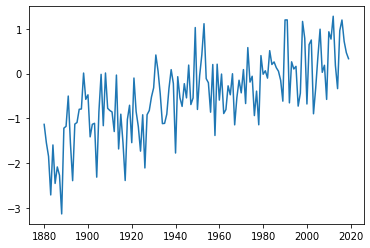

In [17]:
pp.plot(allyears, allavg - midcentury)

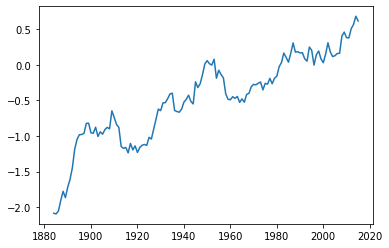

In [19]:
pp.plot(allyears[4:-4], smooth(allavg - midcentury, 9, 'valid'))

In [20]:
#historical range
allyears = np.arange(1880, 2020)

def plotanomaly(station):
    #grab data
    alldata = np.vstack([getweather.getyear(station,['TMIN', 'TMAX'], year)
                     for year in allyears])
    #make yearly averages, and then the midcentury average
    allavg = np.nanmean(0.5 * (alldata["TMIN"] + alldata["TMAX"]), axis =1)
    midcentury = np.nanmean(allavg[65:75])
    #plot with smoothing, adding a label that we can show in a legend
    pp.plot(allyears[4:-4], smooth(allavg - midcentury, 9, 'valid'), label = station)
    #and set a reasonable range
    pp.axis(ymin = -3, ymax = 3)
    
    
    

C:\Users\Zumran\anaconda3\lib\site-packages\ipykernel_launcher.py:9: RuntimeWarning: Mean of empty slice
  if __name__ == '__main__':
C:\Users\Zumran\anaconda3\lib\site-packages\ipykernel_launcher.py:9: RuntimeWarning: Mean of empty slice
  if __name__ == '__main__':


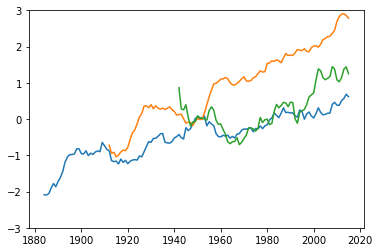

In [21]:
plotanomaly('NEW YORK')
plotanomaly('PASADENA')
plotanomaly("MINNEAPOLIS")
plot.legend()